In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

In [2]:
train = pd.read_csv('case_study_bookings_train.csv', sep='\t')

In [3]:
train.head()

,ymd,user_id,session_id,referer_code,is_app,agent_id,traffic_type,has_booking
0,20170423,388309106223940,3052767322364990735,0,0,2,1,0
1,20170410,452426828488840,1022778951418899936,0,0,10,2,0
2,20170415,452426828488840,4191504489082712531,0,0,10,2,0
3,20170406,819438352219100,4560227804862289210,1,0,1,1,0
4,20170407,1113732603712480,4115013282086590434,0,0,9,2,0


##### Checking if there is any null value in booking_train dataset

In [4]:
print(train.isnull().values.sum())

0


# Chi-square test

### Between 'referer_code' and  'has_booking'

In [5]:
referCode_HasBooking = train[['referer_code', 'has_booking']]
referCode_HasBooking.head()

,referer_code,has_booking
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [6]:
referCode_HasBooking['referer_code'].value_counts()

1     112484
0     105691
99     66524
15      9143
11      6700
10      3266
24      3118
21       406
23       289
17        53
19         3
Name: referer_code, dtype: int64

In [7]:
referCode_HasBooking['has_booking'].value_counts()

0    288030
1     19647
Name: has_booking, dtype: int64

### The Null and Alternate Hypotheses for Chi-Square test

##### H0:There is no statistically significant relationship between referer_code and has_booking. 
##### Ha:There is a statistically significant relationship between referer_code and has_booking. 

In [8]:
contingency_table = pd.crosstab(
    referCode_HasBooking['has_booking'],
    referCode_HasBooking['referer_code'],
    margins = True
)
contingency_table

referer_code,0,1,10,11,15,17,19,21,23,24,99,All
has_booking,,,,,,,,,,,,
0,98367,102661,2966,5921,9065,52,3,355,280,3118,65242,288030
1,7324,9823,300,779,78,1,0,51,9,0,1282,19647
All,105691,112484,3266,6700,9143,53,3,406,289,3118,66524,307677


#### Visualizing the Contingency Table with a Stacked Bar Chart

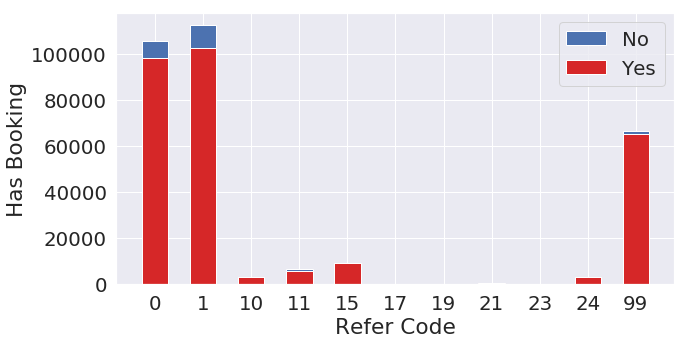

In [9]:
#Assigns the frequency values
No = contingency_table.iloc[0][0:11].values
Yes = contingency_table.iloc[1][0:11].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0","1","10","11","15","17","19","21","23","24","99"]
p1 = plt.bar(categories, No, 0.55, color='#d62728')
p2 = plt.bar(categories, Yes, 0.55, bottom=No)
plt.legend((p2[0], p1[0]), ('No', 'Yes'))
plt.xlabel('Refer Code')
plt.ylabel('Has Booking')
plt.show()

In [10]:
f_obs = np.append(contingency_table.iloc[0][0:11].values, contingency_table.iloc[1][0:11].values)
f_obs

array([ 98367, 102661,   2966,   5921,   9065,     52,      3,    355,
          280,   3118,  65242,   7324,   9823,    300,    779,     78,
            1,      0,     51,      9,      0,   1282])

In [11]:
row_sums = contingency_table.iloc[0:2,11].values
row_sums

array([288030,  19647])

In [12]:
col_sums = contingency_table.iloc[2,0:11].values
col_sums

array([105691, 112484,   3266,   6700,   9143,     53,      3,    406,
          289,   3118,  66524])

In [13]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[98942.00323716104,
 105301.22992618883,
 3057.4465429655124,
 6272.165290223189,
 8559.165260971733,
 49.61563587788493,
 2.80843221950292,
 380.0744937060619,
 270.545637145448,
 2918.897220136702,
 62276.04832340409,
 6748.996762838951,
 7182.770073811173,
 208.55345703448748,
 427.8347097768114,
 583.8347390282667,
 3.384364122115075,
 0.19156778049707973,
 25.925506293938124,
 18.454362854552013,
 199.1027798632982,
 4247.951676595911]

In [14]:
chi_squared_statistic_referer_code = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic_referer_code))

Chi-squared Statistic: 4365.767623826621


In [15]:
dof_referer_code = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof_referer_code))

Degrees of Freedom: 10


# Chi-square test

### Between 'agent_id' and  'has_booking'

In [16]:
agent_id_HasBooking = train[['agent_id', 'has_booking']]
agent_id_HasBooking.head()

,agent_id,has_booking
0,2,0
1,10,0
2,10,0
3,1,0
4,9,0


In [17]:
agent_id_HasBooking['agent_id'].value_counts()

9     72119
10    56731
1     56089
8     52646
6     19068
13    15811
7     12117
14    10003
2      9391
12     1608
0      1255
11      653
4        88
3        55
5        43
Name: agent_id, dtype: int64

In [18]:
referCode_HasBooking['has_booking'].value_counts()

0    288030
1     19647
Name: has_booking, dtype: int64

### The Null and Alternate Hypotheses for Chi-Square test

##### H0:There is no statistically significant relationship between referer_code and has_booking. 
##### Ha:There is a statistically significant relationship between referer_code and has_booking. 

In [19]:
contingency_table = pd.crosstab(
    agent_id_HasBooking['has_booking'],
    agent_id_HasBooking['agent_id'],
    margins = True
)
contingency_table

agent_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
has_booking,,,,,,,,,,,,,,,,
0,1191,51166,8487,54,88,43,17370,10821,49720,68410,54456,616,1566,15076,8966,288030
1,64,4923,904,1,0,0,1698,1296,2926,3709,2275,37,42,735,1037,19647
All,1255,56089,9391,55,88,43,19068,12117,52646,72119,56731,653,1608,15811,10003,307677


#### Visualizing the Contingency Table with a Stacked Bar Chart

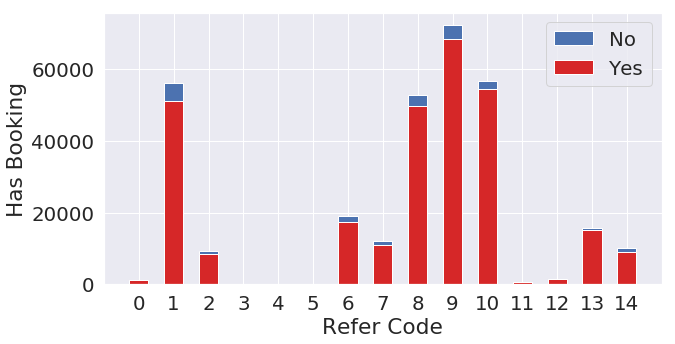

In [20]:
#Assigns the frequency values
No = contingency_table.iloc[0][0:15].values
Yes = contingency_table.iloc[1][0:15].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14"]
p1 = plt.bar(categories, No, 0.55, color='#d62728')
p2 = plt.bar(categories, Yes, 0.55, bottom=No)
plt.legend((p2[0], p1[0]), ('No', 'Yes'))
plt.xlabel('Refer Code')
plt.ylabel('Has Booking')
plt.show()

In [21]:
f_obs = np.append(contingency_table.iloc[0][0:15].values, contingency_table.iloc[1][0:15].values)
f_obs

array([ 1191, 51166,  8487,    54,    88,    43, 17370, 10821, 49720,
       68410, 54456,   616,  1566, 15076,  8966,    64,  4923,   904,
           1,     0,     0,  1698,  1296,  2926,  3709,  2275,    37,
          42,   735,  1037])

In [22]:
row_sums = contingency_table.iloc[0:2,15].values
row_sums

array([288030,  19647])

In [23]:
col_sums = contingency_table.iloc[2,0:15].values
col_sums

array([ 1255, 56089,  9391,    55,    88,    43, 19068, 12117, 52646,
       72119, 56731,   653,  1608, 15811, 10003])

In [24]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[1174.8608118253883,
 52507.38491989976,
 8791.328991117309,
 51.487924024220206,
 82.38067843875233,
 40.254195146208524,
 17850.39518716056,
 11343.257734572295,
 49284.24087598358,
 67513.77441277704,
 53108.38941487339,
 611.302079778469,
 1505.3196696535654,
 14801.373940853557,
 9364.249163895904,
 80.13918817461169,
 3581.615080100235,
 599.6710088826919,
 3.512075975779795,
 5.619321561247672,
 2.7458048537914763,
 1217.6048128394389,
 773.742265427705,
 3361.7591240164197,
 4605.225587222964,
 3622.61058512661,
 41.69792022153102,
 102.68033034643473,
 1009.6260591464426,
 638.7508361040962]

In [25]:
chi_squared_statistic_agent_id = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic_agent_id))

Chi-squared Statistic: 2461.0311853484927


In [26]:
dof_agent_id = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof_agent_id))

Degrees of Freedom: 14


# Chi-square test

### Between 'is_app' and  'has_booking'

In [27]:
is_app_HasBooking = train[['is_app', 'has_booking']]
is_app_HasBooking.head()

,is_app,has_booking
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [28]:
is_app_HasBooking['is_app'].value_counts()

0    285041
1     22636
Name: is_app, dtype: int64

In [29]:
is_app_HasBooking['has_booking'].value_counts()

0    288030
1     19647
Name: has_booking, dtype: int64

### The Null and Alternate Hypotheses for Chi-Square test

##### H0:There is no statistically significant relationship between referer_code and has_booking. 
##### Ha:There is a statistically significant relationship between referer_code and has_booking. 

In [30]:
contingency_table = pd.crosstab(
    is_app_HasBooking['has_booking'],
    is_app_HasBooking['is_app'],
    margins = True
)
contingency_table

is_app,0,1,All
has_booking,,,
0,266318,21712,288030
1,18723,924,19647
All,285041,22636,307677


#### Visualizing the Contingency Table with a Stacked Bar Chart

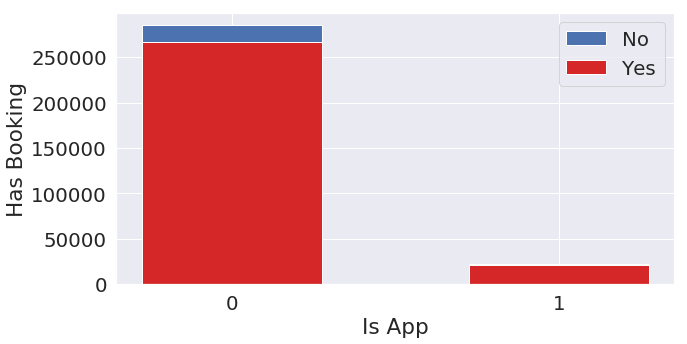

In [31]:
#Assigns the frequency values
No = contingency_table.iloc[0][0:2].values
Yes = contingency_table.iloc[1][0:2].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0","1"]
p1 = plt.bar(categories, No, 0.55, color='#d62728')
p2 = plt.bar(categories, Yes, 0.55, bottom=No)
plt.legend((p2[0], p1[0]), ('No', 'Yes'))
plt.xlabel('Is App')
plt.ylabel('Has Booking')
plt.show()

In [32]:
f_obs = np.append(contingency_table.iloc[0][0:2].values, contingency_table.iloc[1][0:2].values)
f_obs

array([266318,  21712,  18723,    924])

In [33]:
row_sums = contingency_table.iloc[0:2,2].values
row_sums

array([288030,  19647])

In [34]:
col_sums = contingency_table.iloc[2,0:2].values
col_sums

array([285041,  22636])

In [35]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[266839.4427597773, 21190.5572402227, 18201.5572402227, 1445.442759777299]

In [36]:
chi_squared_statistic_is_app = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic_is_app))

Chi-squared Statistic: 216.89892149487767


In [37]:
dof_is_app = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof_is_app))

Degrees of Freedom: 1


# Chi-square test

### Between 'traffic_type' and  'has_booking'

In [38]:
traffic_type_HasBooking = train[['traffic_type', 'has_booking']]
traffic_type_HasBooking.head()

,traffic_type,has_booking
0,1,0
1,2,0
2,2,0
3,1,0
4,2,0


In [39]:
traffic_type_HasBooking['traffic_type'].value_counts()

1     110848
2      89600
6      60570
4      25675
3      19675
10       706
7        603
Name: traffic_type, dtype: int64

In [40]:
traffic_type_HasBooking['has_booking'].value_counts()

0    288030
1     19647
Name: has_booking, dtype: int64

### The Null and Alternate Hypotheses for Chi-Square test

##### H0:There is no statistically significant relationship between referer_code and has_booking. 
##### Ha:There is a statistically significant relationship between referer_code and has_booking. 

In [41]:
contingency_table = pd.crosstab(
    traffic_type_HasBooking['has_booking'],
    traffic_type_HasBooking['traffic_type'],
    margins = True
)
contingency_table

traffic_type,1,2,3,4,6,7,10,All
has_booking,,,,,,,,
0,99485,83811,18368,25493,59568,600,705,288030
1,11363,5789,1307,182,1002,3,1,19647
All,110848,89600,19675,25675,60570,603,706,307677


#### Visualizing the Contingency Table with a Stacked Bar Chart

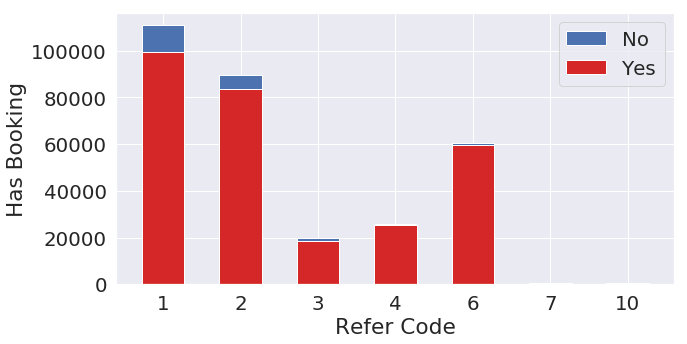

In [42]:
#Assigns the frequency values
No = contingency_table.iloc[0][0:7].values
Yes = contingency_table.iloc[1][0:7].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["1","2","3","4","6","7","10"]
p1 = plt.bar(categories, No, 0.55, color='#d62728')
p2 = plt.bar(categories, Yes, 0.55, bottom=No)
plt.legend((p2[0], p1[0]), ('No', 'Yes'))
plt.xlabel('Refer Code')
plt.ylabel('Has Booking')
plt.show()

In [43]:
f_obs = np.append(contingency_table.iloc[0][0:7].values, contingency_table.iloc[1][0:7].values)
f_obs

array([99485, 83811, 18368, 25493, 59568,   600,   705, 11363,  5789,
        1307,   182,  1002,     3,     1])

In [44]:
row_sums = contingency_table.iloc[0:2,7].values
row_sums

array([288030,  19647])

In [45]:
col_sums = contingency_table.iloc[2,0:7].values
col_sums

array([110848,  89600,  19675,  25675,  60570,    603,    706])

In [46]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[103769.69822248656,
 83878.50895582055,
 18418.63463957332,
 24035.49907857916,
 56702.24651176396,
 564.4948761200869,
 660.917715656354,
 7078.301777513431,
 5721.491044179448,
 1256.3653604266813,
 1639.5009214208408,
 3867.7534882360396,
 38.50512387991303,
 45.082284343646094]

In [47]:
chi_squared_statistic_traffic_type = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic_traffic_type))

Chi-squared Statistic: 6506.874658406188


In [48]:
dof_traffic_type = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof_traffic_type))

Degrees of Freedom: 6


## RESULTS:

In [51]:
print('Chi-squared Statistic between has_booking and referer_code : {}'.format(chi_squared_statistic_referer_code))
print("Degrees of Freedom between has_booking and referer_code : {}".format(dof_referer_code))
print()
print('Chi-squared Statistic between has_booking and is_app : {}'.format(chi_squared_statistic_is_app))
print("Degrees of Freedom between has_booking and is_app : {}".format(dof_is_app))
print()
print('Chi-squared Statistic between has_booking and agent_id : {}'.format(chi_squared_statistic_agent_id))
print("Degrees of Freedom between has_booking and agent_id : {}".format(dof_agent_id))
print()
print('Chi-squared Statistic between has_booking and traffic_type : {}'.format(chi_squared_statistic_traffic_type))
print("Degrees of Freedom between has_booking and traffic_type : {}".format(dof_traffic_type))
print()

Chi-squared Statistic between has_booking and referer_code : 4365.767623826621
Degrees of Freedom between has_booking and referer_code : 10

Chi-squared Statistic between has_booking and is_app : 216.89892149487767
Degrees of Freedom between has_booking and is_app : 1

Chi-squared Statistic between has_booking and agent_id : 2461.0311853484927
Degrees of Freedom between has_booking and agent_id : 14

Chi-squared Statistic between has_booking and traffic_type : 6506.874658406188
Degrees of Freedom between has_booking and traffic_type : 6

